In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from skimage.io import imread
import torchvision

In [7]:
%matplotlib inline

In [10]:
root_path = '/content/sample_data/input/classification_dataset'

In [44]:
train_images = glob(os.path.join('/content/sample_data/input/classification_dataset/train', '*', '*.jpg'))
test_images = glob(os.path.join('/content/sample_data/input/classification_dataset/test', '*', '*.jpg'))

train_image_data = pd.DataFrame({'path': train_images, 'stage': ['train' for _ in range(len(train_images))]})
test_image_data = pd.DataFrame({'path': test_images, 'stage': ['test' for _ in range(len(test_images))]})

In [46]:
train_test = pd.concat([train_image_data, test_image_data], ignore_index=True)
train_test.head(10)

,path,stage
0,/content/sample_data/input/classification_data...,train
1,/content/sample_data/input/classification_data...,train
2,/content/sample_data/input/classification_data...,train
3,/content/sample_data/input/classification_data...,train
4,/content/sample_data/input/classification_data...,train
5,/content/sample_data/input/classification_data...,train
6,/content/sample_data/input/classification_data...,train
7,/content/sample_data/input/classification_data...,train
8,/content/sample_data/input/classification_data...,train
9,/content/sample_data/input/classification_data...,train


In [47]:
train_test['images'] = train_test['path'].map(imread)

In [48]:
color_features_names = ['Gray', 'Red', 'Green', 'Blue']

def create_color_features(data_frm):
    data_frm['Red'] = data_frm['images'].map(lambda x: np.mean(x[:,:,0]))
    data_frm['Green'] = data_frm['images'].map(lambda x: np.mean(x[:,:,1]))
    data_frm['Blue'] = data_frm['images'].map(lambda x: np.mean(x[:,:,2]))
    data_frm['Gray'] = data_frm['images'].map(lambda x: np.mean(x))
    return data_frm

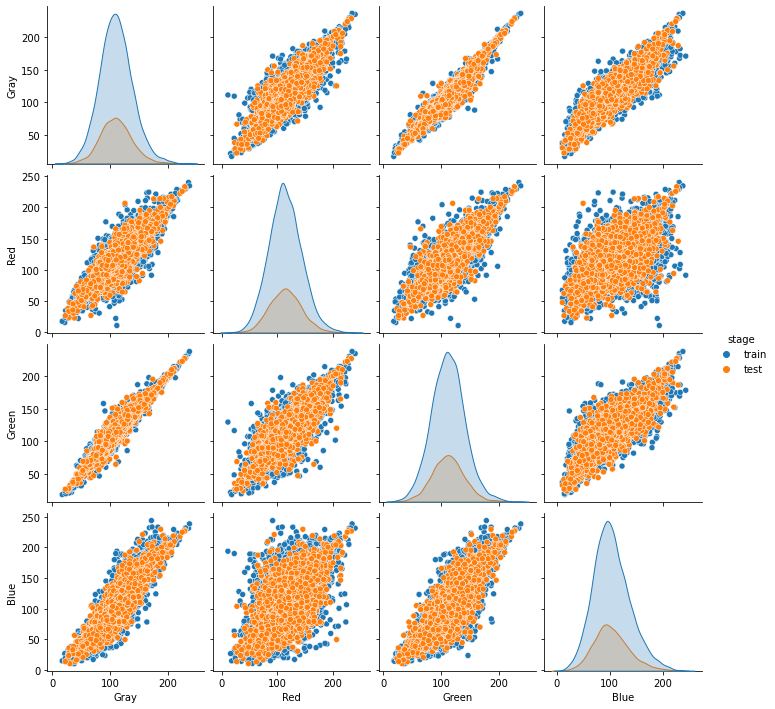

In [49]:
image_data = create_color_features(train_test)

sns.pairplot(image_data[color_features_names+['stage']], 
             hue = 'stage')